# PSO Learning Plot

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# custom colors
colors = [(0/255.,191/255.,196/255.), (248/255.,118/255.,109/255.), (150/255.,120/255.,170/255.)]

## TODO
* Should take as input a single path
* Should output a figure with the 4 subfigures from experiments run from `scripts/run_pso.py`

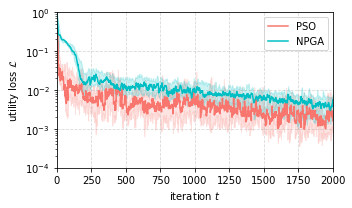

In [11]:
fig, ax = plt.subplots(figsize=(5, 3))

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

agg = [percentile(25), percentile(75), 'median']

# pso
color = colors[1]
df = pd.read_csv('/home/kohring/bnelearn/experiments/pso/single_item/first_price/uniform/asymmetric/risk_neutral/2p/2021-05-14 Fri 12.45/full_results.csv')
df_sub = df[df['tag'] == 'eval/epsilon_relative'][['epoch', 'value']]
df_sub = df_sub.groupby('epoch').agg(agg)
df_sub.columns = ['min', 'max', 'mean']
df_sub.head()
x, y, mi, ma = df_sub.index, df_sub['mean'], df_sub['min'], df_sub['max']
plt.plot(x, y, '-', label='PSO', color=color)
plt.fill_between(x, mi, ma, alpha=.2, color=color)

# npga
color = colors[0]
df = pd.read_csv('/home/kohring/bnelearn/experiments/single_item/first_price/uniform/asymmetric/risk_neutral/2p/2021-05-03 Mon 11.07/full_results.csv')
df_sub = df[df['tag'] == 'eval/epsilon_relative'][['epoch', 'value']]
df_sub = df_sub.groupby('epoch').agg(agg)
df_sub.columns = ['min', 'max', 'mean']
df_sub.head()
x, y, mi, ma = df_sub.index, df_sub['mean'], df_sub['min'], df_sub['max']
plt.plot(x, y, '-', label='NPGA', color=color)
plt.fill_between(x, mi, ma, alpha=.2, color=color)

# plot
ax.set_yscale('log')
ax.set_xlim([0, max(x)])
ax.set_ylim([1e-4, 1e0])
plt.grid(which='major', alpha=.5, linestyle='--')
ax.set_xlabel('iteration $t$')
ax.set_ylabel('utility loss $\mathcal{L}$')
plt.legend()
plt.tight_layout()
# plt.savefig('learning_progress.pdf', format='pdf')
plt.show()